In [1]:
import pandas as pd
import os
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()

'/home/piai/문서/빅데이터프로젝트'

In [2]:
df = pd.read_csv("./df.csv", encoding = 'euc-kr')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
# 목표 달성 했는지 안했는지 여부 확인하는 열 추가
df['성공여부']=df['상품목표취급금액'] - df['매출액']
df['성공여부'] = ['실패' if x > 0 else '성공' for x in df['성공여부']]

계절
겨울    29802264000
여름    28542910800
봄     28102031800
가을    19224286900
Name: 매출액, dtype: int64


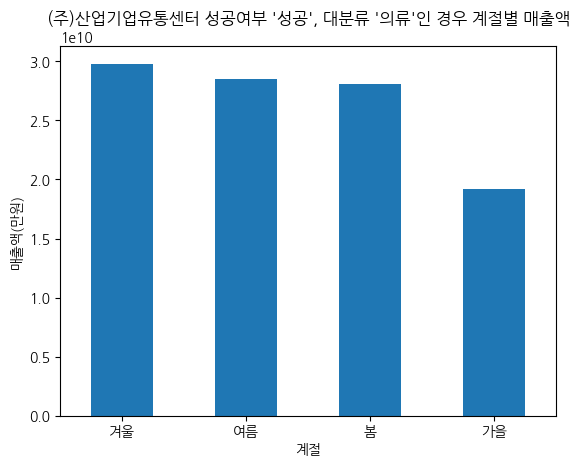

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# '성공여부' 열 '성공'이고 '대분류'가 '식품'인 경우 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '의류') & (df['협력사명'] == '(주)산업기업유통센터')]

# '계절' 별 '매출액' 총합 구하기
df_season_sum = df_filtered.groupby('계절')['매출액'].sum()

# 총합이 큰 순서대로 정렬
df_season_sum = df_season_sum.sort_values(ascending=False)

# 결과 출력
print(df_season_sum)

# 그래프 그리기
df_season_sum.plot(kind='bar', rot=0)

# 그래프 제목 설정
plt.title("(주)산업기업유통센터 성공여부 '성공', 대분류 '의류'인 경우 계절별 매출액")

# 그래프 축 레이블 설정
plt.xlabel("계절")
plt.ylabel("매출액(만원)")

# 그래프 출력
plt.show()


Text(0, 0.5, '요일')

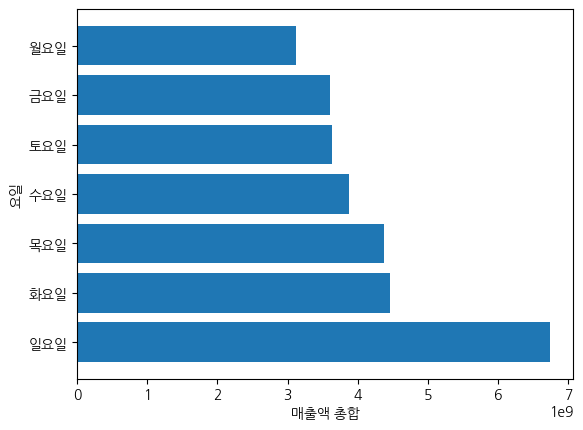

In [7]:
import matplotlib.pyplot as plt

# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름'인 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '의류') & (df['계절'] == '겨울')  & (df['협력사명'] == '(주)산업기업유통센터')]

# 각 요일별 매출액 총합 계산
df_day_sum = df_filtered.groupby('요일')['매출액'].sum()

# 매출액 총합이 큰 순으로 정렬하여 그래프 출력
plt.barh(df_day_sum.sort_values(ascending=False).index, df_day_sum.sort_values(ascending=False).values)
plt.xlabel('매출액 총합')
plt.ylabel('요일')


In [9]:
import pandas as pd


# 시간대 구분 함수 정의
def get_time_category(hour):
    hour = int(hour)
    if 0 <= hour < 3:
        return '심야'
    elif 3 <= hour < 6:
        return '새벽'
    elif 6 <= hour < 9:
        return '아침'
    elif 9 <= hour < 12:
        return '오전'
    elif 12 <= hour < 15:
        return '점심'
    elif 15 <= hour < 18:
        return '오후'
    elif 18 <= hour < 21:
        return '저녁'
    elif 21 <= hour < 24:
        return '야간'

# '시간대' 열 생성
df['시간대'] = df['시작시간'].apply(get_time_category)



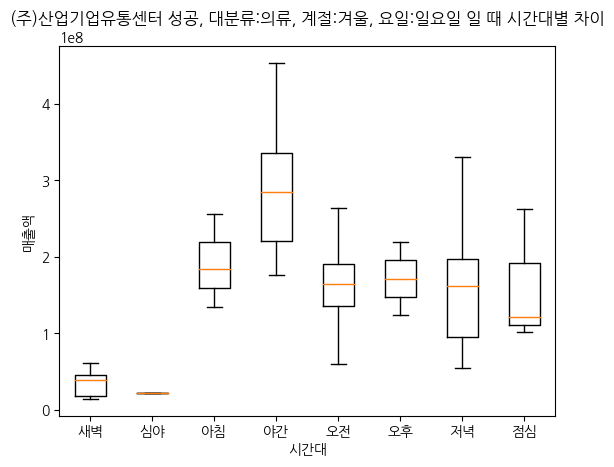

In [11]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '의류') & (df['계절'] == '겨울') & (df['요일'] == '일요일') & (df['협력사명'] == '(주)산업기업유통센터')]

# '시간대'별 '매출액'을 리스트로 추출
hours = sorted(list(set(df_filtered['시간대'])))
data = [df_filtered[df_filtered['시간대'] == hour]['매출액'].tolist() for hour in hours]

# box plot 그리기
fig, ax = plt.subplots()
ax.boxplot(data, labels=hours)
ax.set_title('(주)산업기업유통센터 성공, 대분류:의류, 계절:겨울, 요일:일요일 일 때 시간대별 차이')
ax.set_xlabel('시간대')
ax.set_ylabel('매출액')
plt.show()

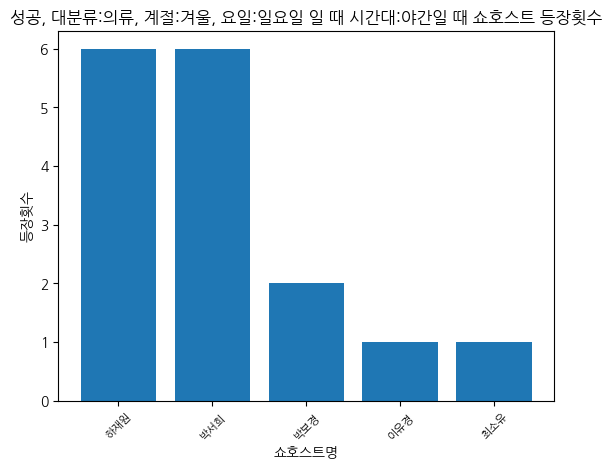

In [12]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일', '시간대'가 '오전'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '의류') & (df['계절'] == '겨울') & (df['요일'] == '일요일') & (df['시간대'] == '야간')& (df['협력사명'] == '(주)산업기업유통센터')]

# 'SH' 등장 횟수 추출
freq_dict = {}

for idx, row in df_filtered.iterrows():
    names = row['SH'].split(',')
    for name in names:
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

# 등장 횟수가 큰 순서대로 정렬
sorted_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# 그래프 생성 
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title("성공, 대분류:의류, 계절:겨울, 요일:일요일 일 때 시간대:야간일 때 쇼호스트 등장횟수")
plt.xlabel("쇼호스트명")
plt.ylabel("등장횟수")

# x축 라벨 회전 및 fontsize 조간
plt.xticks(rotation=45, fontsize=8)

plt.show()


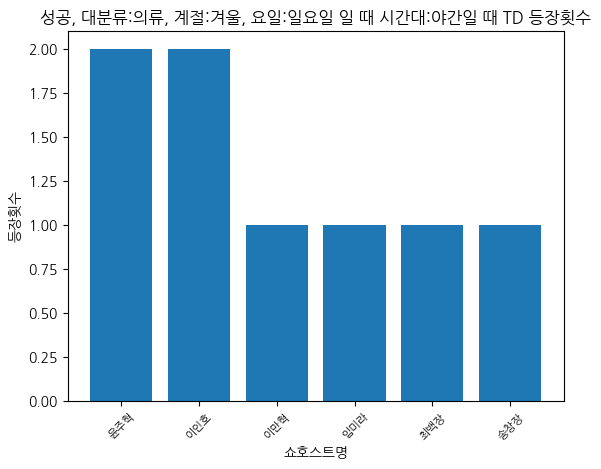

In [14]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일', '시간대'가 '오전'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '의류') & (df['계절'] == '겨울') & (df['요일'] == '일요일') & (df['시간대'] == '야간')& (df['협력사명'] == '(주)산업기업유통센터')]

# 'SH' 등장 횟수 추출
freq_dict = {}

for idx, row in df_filtered.iterrows():
    names = row['TD'].split(',')
    for name in names:
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

# 등장 횟수가 큰 순서대로 정렬
sorted_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# 그래프 생성 
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title("성공, 대분류:의류, 계절:겨울, 요일:일요일 일 때 시간대:야간일 때 TD 등장횟수")
plt.xlabel("쇼호스트명")
plt.ylabel("등장횟수")

# x축 라벨 회전 및 fontsize 조간
plt.xticks(rotation=45, fontsize=8)

plt.show()
